In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#!pip install pydot

In [3]:
#!pip install keras==2.10.0

In [ ]:
#!pip install tensorflow==2.10.0

In [2]:
from keras.datasets import mnist

#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [3]:
X_train_digit  #15 images ,1st row for 1st images second row for 2nd images upto 15 images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_test_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train_digit    #15 images

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

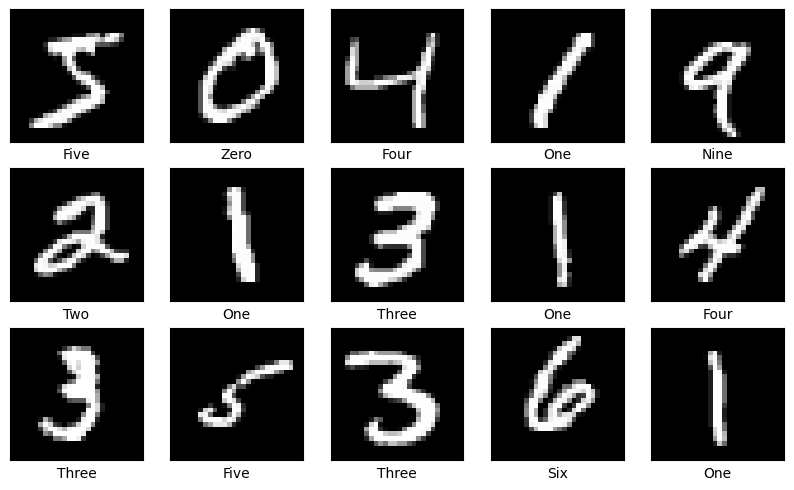

In [6]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)    #(0-14 images) 0+1= 1 up first number 5 so down five, 1+1=2 up second no 0 so down zero , upto 15 iterations
    plt.xticks([]) #x axis not represent any numbers 
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

### INPUT PREPROCESSING ANN ACCEPTS 2D SO 3D CONVERT TO 2D

In [7]:
X_train_digit.shape   #its in 3D. ANN works only in 2D. 28x28 matirx of above each image. All train set of 60000 count as 28x28

(60000, 28, 28)

In [8]:
X_train_digit = X_train_digit.reshape(60000, 784) #using of reshape into 2D 28x28=784 (flattern). 60000(image) wont change
X_test_digit = X_test_digit.reshape(10000, 784) 

In [9]:
X_train_digit.shape    #2D shape

(60000, 784)

In [10]:
X_test_digit.shape

(10000, 784)

### HOW OUTPUT SHOULD BE IN ANN

In [11]:
y_test_digit.shape   #its 1D shape 1D to one hotencoding

(10000,)

In [12]:
y_train_digit.shape

(60000,)

In [13]:
#Encoding Digit MNIST Labels
from keras.utils import to_categorical     #0-9 10 classes

y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [14]:
y_train_digit[1]    #In ANN output should be in one hot encoding  first la 1 so its zero

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
y_train_digit[2]   #4 la 1 so its 4

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_train_digit[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### CODE FOR BRAIN ACTIVITY

In [17]:
#Creating base neural network
from keras.models import Sequential         #its just a proceedure for brain activity

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),  #activation functi-256-playable parame(hiddenlay-1rrevi test),784=28x28(input neurons)
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),    #2hiddenlayer(2revision test)
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),    #3hiddenlayer(3revision test)
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),   #output,10--> classifica count  
])

In [18]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()   # 784 cells->256 oda epadi react achu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [20]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))
                     #train-padikardhu                                                                 #test-revision test  repeated nadakum
        #one epoch-entire dataset is passed (Feed Forw and Back Propoga) through neural n/w only once
        #batch_size is no of train(i/p) samples that are fed to the neural n/w at once
#60000 images ah 100 batch kula send panalam,1epoch feedforward and back propogation finish only once 

Epoch 1/10
600/600 [==============================] - 6s 7ms/step - loss: 1.4724 - accuracy: 0.8484 - val_loss: 0.3131 - val_accuracy: 0.9172
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2518 - accuracy: 0.9330 - val_loss: 0.2653 - val_accuracy: 0.9312
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1820 - accuracy: 0.9502 - val_loss: 0.1972 - val_accuracy: 0.9518
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1395 - accuracy: 0.9611 - val_loss: 0.2041 - val_accuracy: 0.9484
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1267 - accuracy: 0.9644 - val_loss: 0.2006 - val_accuracy: 0.9560
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1111 - accuracy: 0.9688 - val_loss: 0.1996 - val_accuracy: 0.9507
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1080 - accuracy: 0.9695 - val_loss: 0.1524 - val_accuracy: 0.9625
Epoch 

In [21]:
# validation_loss test data result val_accuracy test data result (Always we see test data result)
#here accuracy is epoch10/10 96%. if some times accuracy not good go to code for brain activity #layers(dropout) condition can try
# dropout-> in epoch 1/10 accuracy 0.8375-0.3 will do.

In [22]:
# going to test rsult
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)

313/313 [==============================] - 2s 3ms/step


In [24]:
y_predict[0]    # 0-9 la At first 0 image la yena handwriiten image kila [0-9] image number la iruku.partha theriyadhu

array([1.3104514e-07, 9.9999726e-01, 9.9998581e-01, 4.0590722e-02,
       9.9999982e-01, 2.0384559e-02, 5.6961122e-05, 1.0000000e+00,
       2.6128898e-04, 9.9999946e-01], dtype=float32)

In [25]:
y_predict[1]   #next handwritten image

array([7.5517711e-04, 4.8935027e-03, 1.0000000e+00, 3.3747235e-01,
       3.4446206e-05, 1.4670534e-03, 1.3132733e-21, 6.4033810e-03,
       1.6722240e-06, 4.7476438e-01], dtype=float32)

### FOR CONFUSION MATRIX (ACTUAL O/P - PREDIC O/P)(Y_PREDICTS - Y_TEST)

In [26]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
# here we convert to one hot encoded array changes to number 0 image la yena handwritten no nu we knows

In [27]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
y_predicts[0]

7

In [29]:
y_predicts[1]

2

In [38]:
y_predicts[1000]

9

In [39]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)      #test o/p also convert to argmax 

In [40]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [41]:
y_test_digit_eval[0]

7

In [42]:
y_test_digit_eval[1000]

9

### CONFUSION MATRIX IN HEAT MAP FIGURE WHICH NUMBER READ MOSTLY

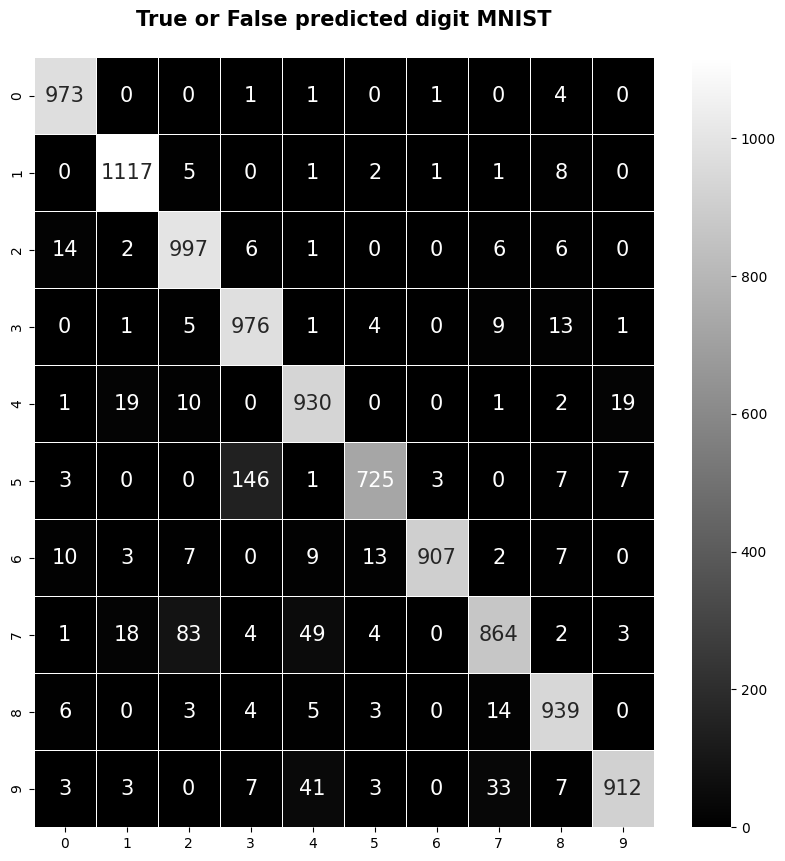

In [47]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [ ]:
#in heat map horizontal-->predicted val  vertical-->actual val  1-1 (white)is highest handwritten 1 shows(nala padichurku predicted) .diagonal only we 
#consider.

### f1 score-- 0.96 is higher value 4 hand written image nicely predicted. lowest 0.56,0.38 3,5 number not predicted (kandupidika mudiyala)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.96      0.98      0.97      1135
           2       0.90      0.97      0.93      1032
           3       0.85      0.97      0.91      1010
           4       0.90      0.95      0.92       982
           5       0.96      0.81      0.88       892
           6       0.99      0.95      0.97       958
           7       0.93      0.84      0.88      1028
           8       0.94      0.96      0.95       974
           9       0.97      0.90      0.93      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000



### SO MANY TIMES READ(FEED FORWRD & BACK PROPOGATION ) SEE THE ACCURACY FOR EPOCH FROM HISTORY

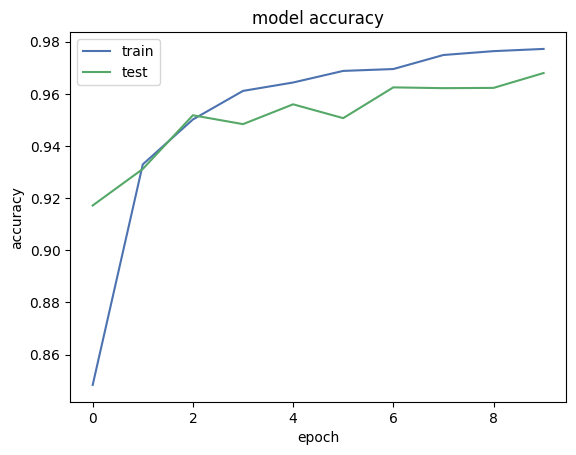

In [49]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.show()

#Acuracy always from Decreasing to Increasing level(more train and test gives good result)

### GRAPH FOR LOSS FUNCTION (GRAPH LINES HIGHEST TO LOWEST-- MISTAKES IS MORE END IT WILL BE LOW)

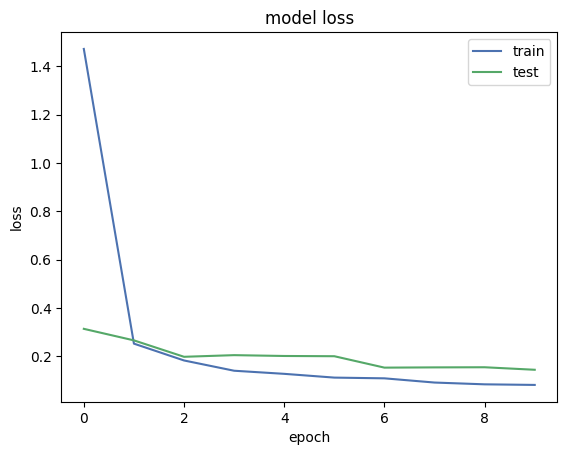

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### SINGLE IMAGE DEPLOYMENT SHOW TO THE USER SATISFACTION

In [68]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])    #X_TEST la oru image passed
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 [==============================] - 0s 39ms/step


In [69]:
y_predicts_single   #2nd image la handwritten 1 so array[1] below

array([1], dtype=int64)

In [58]:
y_test_digit

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

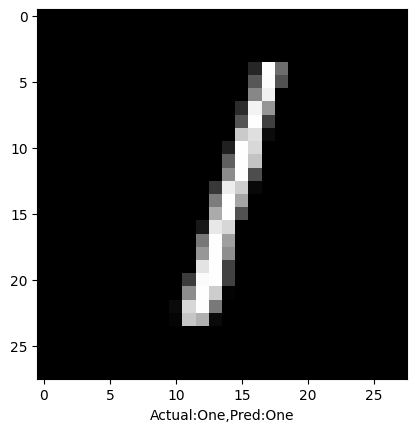

In [59]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')   #784=28x28 matrix
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()                                    #[np.argmax(1)-->so col_names 1 is one so down of the image print one